# QCTO - Workplace Module Project

### Project Title: Physico-chemical parameters of a polluted river located in Buenos Aires
#### Done By: KGOMOTSO DISNEY MALETE
https://github.com/KDisney17/Workplace-Project  
https://trello.com/invite/b/66ec736d6f46747a5f90203c/ATTIcc93f967cb70e07d0eba95ce32981d27D360E5AA/workplace-project


© ExploreAI 2024

---

## Table of Contents

<a href=#BC> Background Context</a>

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Data Collection and Description</a>

<a href=#three>3. Loading Data </a>

<a href=#four>4. Data Cleaning and Filtering</a>

<a href=#five>5. Exploratory Data Analysis (EDA)</a>

<a href=#six>6. Modeling </a>

<a href=#seven>7. Evaluation and Validation</a>

<a href=#eight>8. Final Model</a>

<a href=#nine>9. Conclusion and Future Work</a>

<a href=#ten>10. References</a>

---
 <a id="BC"></a>
## **Background Context**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** The main objective of this project is to track and assess the water quality of different water bodies within a designated area. Monitoring water quality is vital for protecting aquatic ecosystems and maintaining biodiversity. It aids in detecting pollution sources and implementing corrective actions. Securing clean and safe drinking water is critical for public health, and regular water quality monitoring helps prevent waterborne diseases while safeguarding communities. The data gathered from this project will support policy-making concerning water resource management, pollution regulation, and public health initiatives.
* **Details:** Water quality monitoring, environmental conservation, public health, and policy development related to water management and pollution control.
---

---
<a href=#one></a>
## **Importing Packages**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Set up the Python environment with necessary libraries and tools.
* **Details:** List and import all the Python packages that will be used throughout the project such as Pandas for data manipulation, Matplotlib/Seaborn for visualization, scikit-learn for modeling, etc.
---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
import re
from html import unescape
import html

---
<a href=#two></a>
## **Data Collection and Description**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** 
The primary goal is to predict the river's DO (Dissolved Oxygen) level using the other features. The dataset offers important insights into the water quality conditions in the study area.
* **Details:** 
A total of 219 water samples were collected from five distinct locations. The dataset size can vary based on factors like the number of sampling points, measurement frequency, and the data collection period. It likely includes water quality parameters relevant to the study area, such as pH, temperature, dissolved oxygen, conductivity, turbidity, and nutrient concentrations. Most of these parameters are recorded as numerical values (e.g., pH, temperature, conductivity, turbidity), while some data may be categorical, such as the location of sampling points or the type of water body.
---

---
<a href=#three></a>
## **Loading Data**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Load the data into the notebook for manipulation and analysis.
* **Details:** Show the code used to load the data and display the first few rows to give a sense of what the raw data looks like.
---

In [2]:
# Reading the anime.csv file into a DataFrame
River_water_parameters_df1 = pd.read_csv('River water parameters.csv')
print(River_water_parameters_df1.head(3))

  Date (DD/MM/YYYY) Time (24 hrs XX:XX) Sampling point  \
0        09/05/2023               14:15  Puente Bilbao   
1        14/06/2023               14:30  Puente Bilbao   
2        14/06/2023               14:30  Puente Bilbao   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1630          810              1.8        4.30         NaN   
1         1000          490             18.0        5.30         NaN   
2         1000          490             18.0        4.67         NaN   

   Turbidity (NTU)  Hardness\n(mg CaCO3/L) Hardness classification  \
0              NaN                   147.0                  BLANDA   
1             41.2   

In [3]:
# Reading the anime.csv file into a DataFrame
River_water_parameters_df2 = pd.read_csv('River water parameters.xlsx - Base de Datos.csv')
print(River_water_parameters_df2.head(3))

  Date (DD/MM/YYYY) Time (24 hrs XX:XX) Sampling point  \
0         9/05/2023               14:15  Puente Bilbao   
1        14/06/2023               14:30  Puente Bilbao   
2        14/06/2023               14:30  Puente Bilbao   

   Ambient temperature (°C)  Ambient humidity  Sample temperature (°C)   pH  \
0                      17.0              0.47                     19.0  8.3   
1                      11.9              0.47                     13.0  8.1   
2                      11.9              0.47                     13.0  8.2   

   EC\n(µS/cm)  TDS\n(mg/L)  TSS\n(mL sed/L)  DO\n(mg/L)  Level (cm)  \
0         1630          810              1.8        4.30         NaN   
1         1000          490             18.0        5.30         NaN   
2         1000          490             18.0        4.67         NaN   

   Turbidity (NTU)  Hardness\n(mg CaCO3/L) Hardness classification  \
0              NaN                   147.0                  BLANDA   
1             41.2   

In [4]:
River_water_parameters_df1.head(3)


,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,09/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0


In [5]:
River_water_parameters_df2.head(3)

,Date (DD/MM/YYYY),Time (24 hrs XX:XX),Sampling point,Ambient temperature (°C),Ambient humidity,Sample temperature (°C),pH,EC\n(µS/cm),TDS\n(mg/L),TSS\n(mL sed/L),DO\n(mg/L),Level (cm),Turbidity (NTU),Hardness\n(mg CaCO3/L),Hardness classification,Total Cl-\n(mg Cl-/L)
0,9/05/2023,14:15,Puente Bilbao,17.0,0.47,19.0,8.3,1630,810,1.8,4.30,NaN,NaN,147.0,BLANDA,156.0
1,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.1,1000,490,18.0,5.30,NaN,41.2,94.0,BLANDA,78.0
2,14/06/2023,14:30,Puente Bilbao,11.9,0.47,13.0,8.2,1000,490,18.0,4.67,NaN,38.9,86.0,BLANDA,82.0


In [6]:

print(River_water_parameters_df1.shape)

River_water_parameters_df1.info()

(219, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  

In [7]:
print(River_water_parameters_df2.shape)

River_water_parameters_df2.info()

(219, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 219 entries, 0 to 218
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date (DD/MM/YYYY)         219 non-null    object 
 1   Time (24 hrs XX:XX)       219 non-null    object 
 2   Sampling point            219 non-null    object 
 3   Ambient temperature (°C)  219 non-null    float64
 4   Ambient humidity          219 non-null    float64
 5   Sample temperature (°C)   219 non-null    float64
 6   pH                        219 non-null    float64
 7   EC
(µS/cm)                219 non-null    int64  
 8   TDS
(mg/L)                219 non-null    int64  
 9   TSS
(mL sed/L)            213 non-null    float64
 10  DO
(mg/L)                 219 non-null    float64
 11  Level (cm)                180 non-null    float64
 12  Turbidity (NTU)           218 non-null    float64
 13  Hardness
(mg CaCO3/L)     217 non-null    float64
 14  

---
<a href=#four></a>
## **Data Cleaning and Filtering**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Prepare the data for analysis by cleaning and filtering.
* **Details:** Looking at missing values and correcting errors in  that dataset
---

In [10]:
# Check missing values
print("\nMissing values per column")
print(River_water_parameters_df1.isnull().sum())


Missing values per column
Date (DD/MM/YYYY)            0
Time (24 hrs XX:XX)          0
Sampling point               0
Ambient temperature (°C)     0
Ambient humidity             0
Sample temperature (°C)      0
pH                           0
EC\n(µS/cm)                  0
TDS\n(mg/L)                  0
TSS\n(mL sed/L)              6
DO\n(mg/L)                   0
Level (cm)                  39
Turbidity (NTU)              1
Hardness\n(mg CaCO3/L)       2
Hardness classification      2
Total Cl-\n(mg Cl-/L)        6
dtype: int64


In [11]:
import pandas as pd

# Load the dataset
df = pd.read_csv('River water parameters_cleaned.csv')

# Define a function to remove outliers using the IQR method
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filter out the outliers
    filtered_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return filtered_data

# Apply the function to all relevant numeric columns
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Iterate through the numeric columns and remove outliers
for column in numeric_columns:
    df = remove_outliers_iqr(df, column)

# Save the cleaned dataset to a new CSV file
df.to_csv('River water parameters_cleaned.csv', index=False)

print("Outliers removed and data saved to 'River water parameters_cleaned.csv'.")

Outliers removed and data saved to 'River water parameters_cleaned.csv'.


Outliers removed and data saved to 'River water parameters_cleaned.csv'.

---
<a href=#five></a>
## **Exploratory Data Analysis (EDA)**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Explore and visualize the data to uncover patterns, trends, and relationships.
* **Details:** Use statistics and visualizations to explore the data. This may include histograms, box plots, scatter plots, and correlation matrices. Discuss any significant findings.
---


In [12]:
print("Shape of River_water_parameters_df1:", River_water_parameters_df1.shape)

Shape of River_water_parameters_df1: (219, 16)


Shape of River_water_parameters_df1: (219, 16)

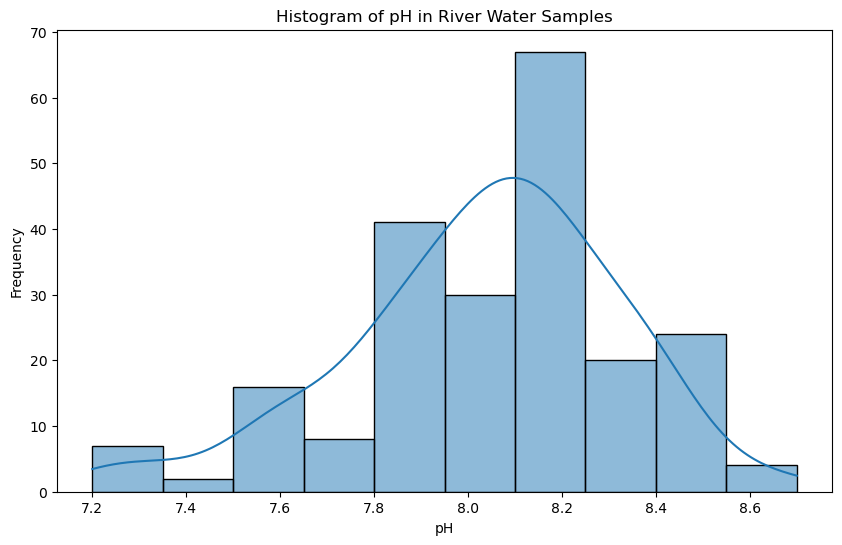

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('River water parameters.csv')

# Example: Plot a histogram for the 'pH' parameter
# Replace 'pH' with any column name from your dataset
parameter_column = 'pH'

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(df[parameter_column], bins=10, kde=True)  # kde=True adds a kernel density estimate

# Customize the chart
plt.title(f'Histogram of {parameter_column} in River Water Samples')
plt.xlabel(parameter_column)
plt.ylabel('Frequency')

# Show the chart
plt.show()


This data is slightly skewed to the left


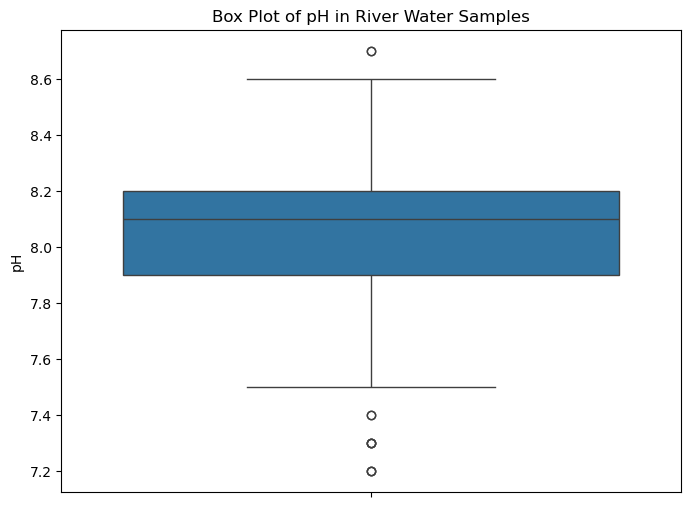

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('River water parameters.csv')

# Example: Plot a box plot for the 'pH' parameter
# Replace 'pH' with any column name from your dataset
parameter_column = 'pH'

# Create the box plot
plt.figure(figsize=(8, 6))
sns.boxplot(y=df[parameter_column])

# Customize the chart
plt.title(f'Box Plot of {parameter_column} in River Water Samples')
plt.ylabel(parameter_column)

# Show the plot
plt.show()

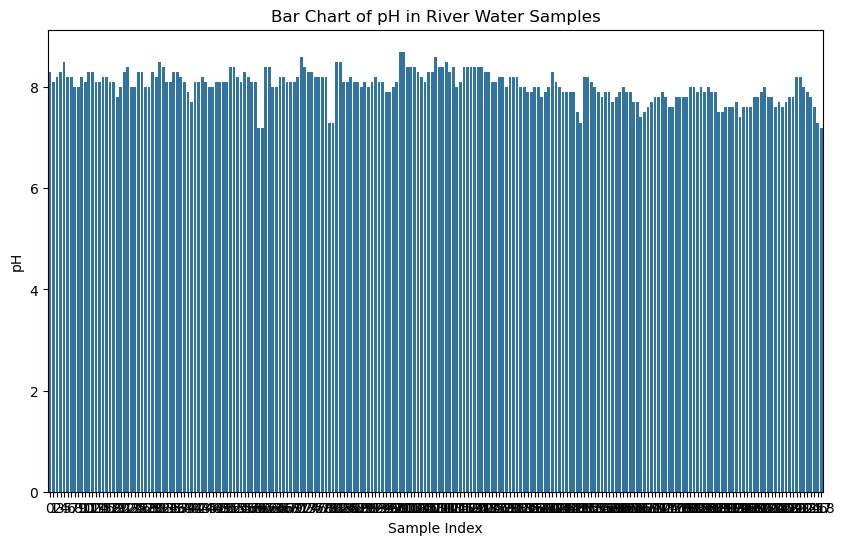

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('River water parameters.csv')

# Example: Plot a bar chart for the 'pH' parameter
# Replace 'pH' with any column name from your dataset that you want to visualize
parameter_column = 'pH'

# Grouping by another column if necessary (e.g., 'Location', 'Date', etc.)
# Replace 'Location' with a column from your dataset (if applicable)
# grouped_data = df.groupby('Location')[parameter_column].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=df.index, y=df[parameter_column])

# Customize the chart
plt.title(f'Bar Chart of {parameter_column} in River Water Samples')
plt.xlabel('Sample Index')
plt.ylabel(parameter_column)

# Show the chart
plt.show()

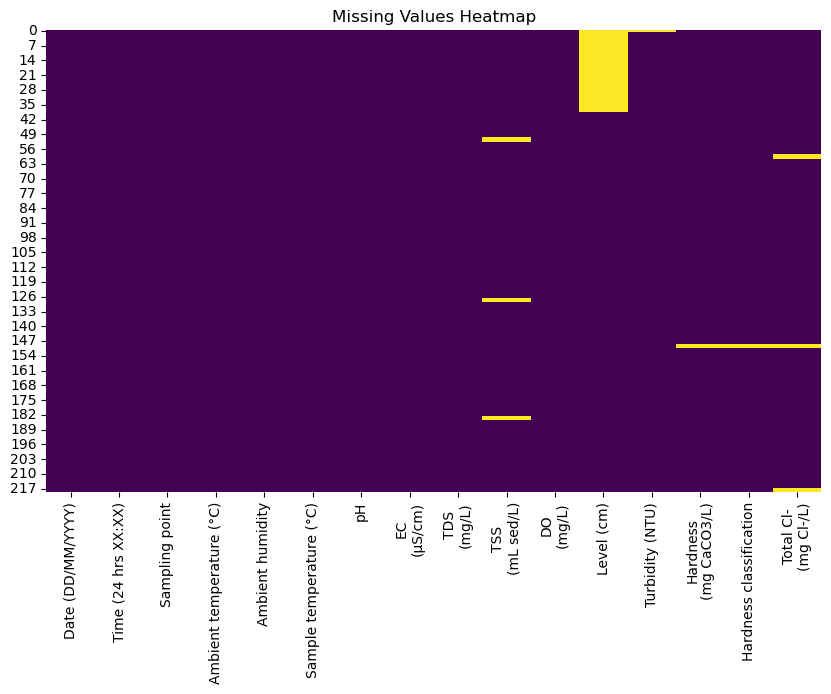

In [16]:
# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

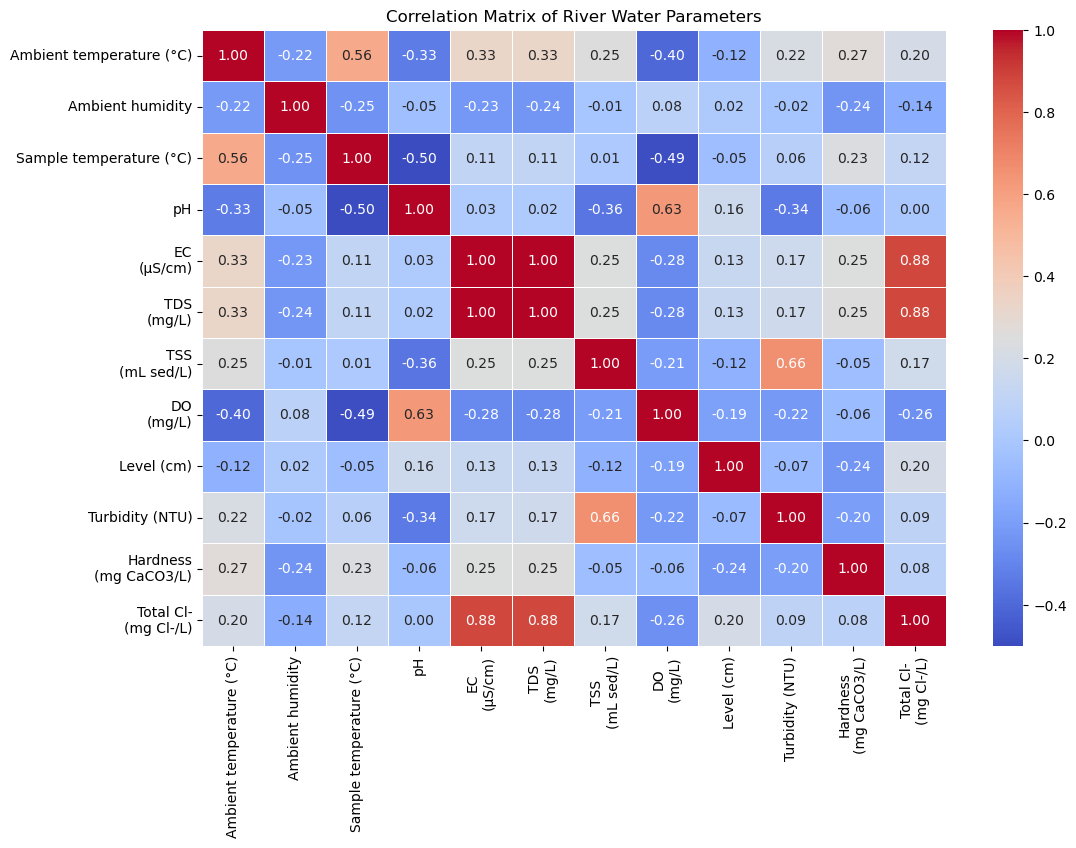

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
df = pd.read_csv('River water parameters.csv')

# Select only numeric columns (e.g., float64, int64)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute the correlation matrix
corr_matrix = numeric_df.corr()

# Plot the correlation matrix using seaborn heatmap
plt.figure(figsize=(12, 8))  # Adjust the figure size for better readability
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Customize the chart
plt.title('Correlation Matrix of River Water Parameters')

# Show the plot
plt.show()

This heatmap visual represents different numeric river water parameters relate to each other. High positive values (close to 1) indicate that the parameters tend to increase together, while negative values (close to -1) suggest an inverse relationship between them.

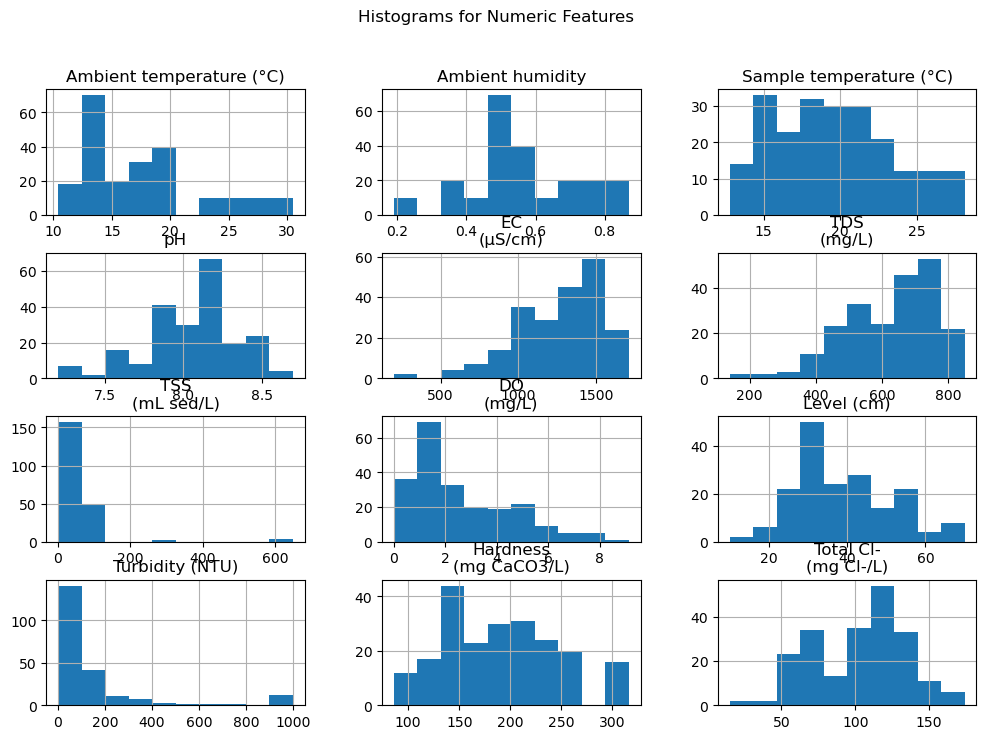

In [18]:
# Histograms for all numeric columns
df.hist(figsize=(12, 8), bins=10)
plt.suptitle('Histograms for Numeric Features')
plt.show()

---
<a href=#six></a>
## **Modeling**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Develop and train predictive or statistical models.
* **Details:** Describe the choice of models, feature selection and engineering processes, and show how the models are trained. Include code for setting up the models and explanations of the model parameters.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#seven></a>
## **Evaluation and Validation**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Evaluate and validate the effectiveness and accuracy of the models.
* **Details:** Present metrics used to evaluate the models, such as accuracy, precision, recall, F1-score, etc. Discuss validation techniques employed, such as cross-validation or train/test split.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#eight></a>
## **Final Model**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Present the final model and its performance.
* **Details:** Highlight the best-performing model and discuss its configuration, performance, and why it was chosen over others.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#nine></a>
## **Conclusion and Future Work**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Summarize the findings and discuss future directions.
* **Details:** Conclude with a summary of the results, insights gained, limitations of the study, and suggestions for future projects or improvements in methodology or data collection.
---


In [ ]:
#Please use code cells to code in and do not forget to comment your code.

---
<a href=#ten></a>
## **References**
<a href=#cont>Back to Table of Contents</a>

* **Purpose:** Provide citations and sources of external content.
* **Details:** List all the references and sources consulted during the project, including data sources, research papers, and documentation for tools and libraries used.
---

In [ ]:
#Please use code cells to code in and do not forget to comment your code.

## Additional Sections to Consider

* ### Appendix: 
For any additional code, detailed tables, or extended data visualizations that are supplementary to the main content.

* ### Contributors: 
If this is a group project, list the contributors and their roles or contributions to the project.
